In [134]:

import pandas as pd
import numpy as np
import matplotlib
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [135]:
def time_convert(x):
    times = x.split(':')
    return (60*int(times[0])+int(times[1]))*60+int(times[2])
df = pd.read_csv('4.csv', converters={'Time': time_convert})
print(df.head(5))

   No   Time DC/AC  Value Unit  AUTO
0  41  69552    DC   -0.1   uA  AUTO
1  42  69552    DC   -0.1   uA  AUTO
2  43  69553    DC   -0.1   uA  AUTO
3  44  69553    DC   -0.1   uA  AUTO
4  45  69553    DC   -0.1   uA  AUTO


In [136]:
# Run only once! Replace numbers with min time and min no
df['Time'] = df['Time'].apply(lambda x: x - 69552)
df['No'] = df['No'].apply(lambda x: x - 41)
print(df.head(2))

   No  Time DC/AC  Value Unit  AUTO
0   0     0    DC   -0.1   uA  AUTO
1   1     0    DC   -0.1   uA  AUTO


In [137]:
c = df.groupby('Time')['Value'].mean()
values = pd.DataFrame(c)
values['Time'] = range(0, len(values['Value']))
#values.to_csv('4_ftl.csv')

In [139]:
rstnce = 10 * math.pow(10,6)
cpctor = 2200 * math.pow(10,-6)
values['Va'] = values.apply(lambda x: 40* (1 - 0.99 * math.e**(-x['Time']/rstnce*cpctor)), axis=1)
print(values.tail(15))

            Value  Time        Va
Time                             
73     581.000000    73  0.400001
74     617.500000    74  0.400001
75     645.000000    75  0.400001
76     673.000000    76  0.400001
77     710.000000    77  0.400001
78     746.500000    78  0.400001
79     783.500000    79  0.400001
80     817.333333    80  0.400001
81     842.000000    81  0.400001
82     875.000000    82  0.400001
83     910.500000    83  0.400001
84     945.500000    84  0.400001
85     980.000000    85  0.400001
86    1006.000000    86  0.400001
87    1022.000000    87  0.400001


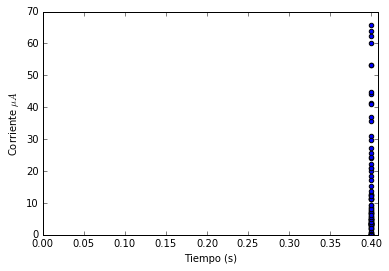

In [121]:
ax = values.plot.scatter(xlim=0, ylim=0, x='Va', y='Value')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel(r'Corriente $\mu A$')